In [7]:
opt = {}
opt.classnum = 40
opt.codebooktxt = '/home/yu/seg_proj/FCN/3d/list/codebook_40.txt' 
opt.classification = 1
local codebooktxt = opt.codebooktxt
codebook = torch.Tensor(40,3)
if type(opt.classification) == 'number' and opt.classification == 1 then 
  local fcode = torch.DiskFile(codebooktxt, 'r')
  for i = 1, 40 do 
    for j = 1, 3 do 
      codebook[{{i},{j}}] = fcode:readFloat()
    end
  end
  fcode:close()
end
print(codebook)

In [14]:
codebook2 = torch.reshape(codebook[{{}, {1}}], opt.classnum ,1,1)
codespatial = torch.expand(codebook2, opt.classnum,  3, 3)
nowoutput = torch.reshape( samples[{{i}, {}, {h}, {w}}], opt.classnum, (#samples)[3], (#samples)[4]) 
print(codespatial)

[string "codebook2 = torch.reshape(codebook[{{}, {1}}]..."]:3: attempt to index global 'samples' (a nil value)
stack traceback:
	[string "codebook2 = torch.reshape(codebook[{{}, {1}}]..."]:3: in main chunk
	[C]: in function 'xpcall'
	/home/yu/tools/torch/install/share/lua/5.1/itorch/main.lua:209: in function </home/yu/tools/torch/install/share/lua/5.1/itorch/main.lua:173>
	/home/yu/tools/torch/install/share/lua/5.1/lzmq/poller.lua:75: in function 'poll'
	.../yu/tools/torch/install/share/lua/5.1/lzmq/impl/loop.lua:307: in function 'poll'
	.../yu/tools/torch/install/share/lua/5.1/lzmq/impl/loop.lua:325: in function 'sleep_ex'
	.../yu/tools/torch/install/share/lua/5.1/lzmq/impl/loop.lua:370: in function 'start'
	/home/yu/tools/torch/install/share/lua/5.1/itorch/main.lua:381: in main chunk
	[C]: in function 'require'
	(command line):1: in main chunk
	[C]: at 0x00406670: 

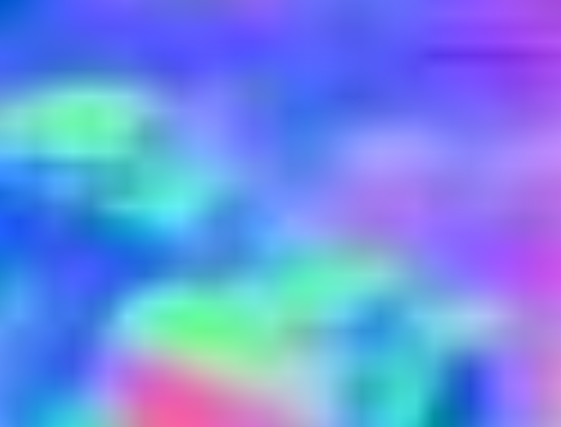

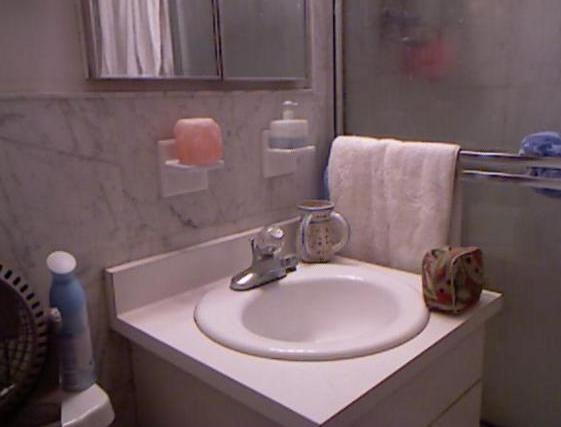

In [12]:
require 'image'
name = '000046'
lbl = image.load('../3d/croptest/rgb_'.. tostring(name) .. '.jpg')
img = image.load('test_res/rgb_'.. tostring(name) .. '.jpg')
img = image.scale(img, (#lbl)[3], (#lbl)[2])
itorch.image(img)
itorch.image(lbl)
image.save('./test_img/lbl_'..name..'.jpg', img)
image.save('./test_img/img_'..name..'.jpg', lbl)